In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/home/ram_swe/Desktop/FFF/sales_data.csv")

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,5.3


In [ ]:
# Customer Summary

b1=df.loc[df["Branch"]=="A"]
b2=df.loc[df["Branch"]=="B"]
b3=df.loc[df["Branch"]=="C"]

# Total Customer
b1 #340  
b2 #332 
b3 #328 

# Male
b1.loc[b1["Gender"]=="Male"] # 179
b2.loc[b2["Gender"]=="Male"] # 170
b3.loc[b3["Gender"]=="Male"] # 150


# Female
b1.loc[b1["Gender"]=="Female"] #161
b2.loc[b2["Gender"]=="Female"] # 162
b3.loc[b3["Gender"]=="Female"] # 178

# Rating
overall_rate_A=b1["Rating"].sum()/340 
overall_rate_B=b2["Rating"].sum()/332
overall_rate_C=b3["Rating"].sum()/328

# Normal customers
bnc1=b1.loc[b1["Customer type"]=="Normal"]
bnc2=b2.loc[b2["Customer type"]=="Normal"]
bnc3=b3.loc[b3["Customer type"]=="Normal"]

# General customer
b1g=b1.loc[b1["Customer type"]=="Member"]
b2g=b2.loc[b2["Customer type"]=="Member"]
b3g=b3.loc[b3["Customer type"]=="Member"]




branch_summary=pd.DataFrame({"Branch":["A","B","C"],
          "Total_Customers":[340,332,328],
          "Male":[179,170,150],
          "Female":[161,162,178],
          "Normal_customers":[173,167,159],
          "Member_customer":[167,165,169],
          "Over_all_rate":[overall_rate_A,overall_rate_B,overall_rate_C]})

branch_summary=branch_summary.set_index("Branch")

want=int(input("Select 1.Dataframe \n2.Visual Data:\t"))
if want==1:
    print(branch_summary)

elif want==2:
  

    x=np.array(["A","B","C"])
    w=0.50

    tc=branch_summary["Total_Customers"]
    y=tc.values
    #-----------------------------------------
    tc1=branch_summary["Male"]
    y1=tc1.values
    #----------------------------------------
    tc2=branch_summary["Female"]
    y2=tc2.values
    #--------------------------------------
    tc3=branch_summary['Member_customer']
    y3=tc3.values
    #--------------------------------------

    tc4=branch_summary['Normal_customers']
    y4=tc4.values
    #--------------------------------------

    #plotting total_customers
    plt.bar(x,y,width=w,label='Total_Customers')

    #plotting male customers
    plt.bar(x,y1,width=w,bottom=y,label="Male_Customers")

    #plotting female customers
    plt.bar(x,y2,width=w,bottom=[y[a]+y1[a]for a in range (len(x))],label="Female_Customers")

    #plotting 
    plt.bar(x,y3,width=w,bottom=[y[a]+y1[a]+y2[a]for a in range (len(x))],label='Member_customers',color='red')

    plt.bar(x,y4,width=w,label="Normal_customers",bottom=[y[a]+y1[a]+y2[a]+y3[a]for a in range (len(x))],color='yellow')

    plt.xlabel("Branch")
    plt.ylabel("No_of_customers")
    plt.legend(loc='lower right') 
    plt.show()



In [ ]:
# cash payments
b1c=b1.loc[b1.loc[:,"Payment"]=="Cash"]
b2c=b2.loc[b2.loc[:,"Payment"]=="Cash"]
b3c=b3.loc[b3.loc[:,"Payment"]=="Cash"]


# Ewallet payments
b1ew=b1.loc[b1.loc[:,"Payment"]=="Ewallet"]
b2ew=b2.loc[b2.loc[:,"Payment"]=="Ewallet"]
b3ew=b3.loc[b3.loc[:,"Payment"]=="Ewallet"]


# Credit card payments
b1cc=b1.loc[b1.loc[:,"Payment"]=="Credit card"]
b2cc=b2.loc[b2.loc[:,"Payment"]=="Credit card"]
b3cc=b3.loc[b3.loc[:,"Payment"]=="Credit card"]

# total_payments
Tb1=(b1c.iloc[:,9].sum())+(b1ew.iloc[:,9].sum())+(b1cc.iloc[:,9].sum())
Tb2=(b2c.iloc[:,9].sum())+(b2ew.iloc[:,9].sum())+(b2cc.iloc[:,9].sum())
Tb3=(b3c.iloc[:,9].sum())+(b3ew.iloc[:,9].sum())+(b3cc.iloc[:,9].sum())

pay_sum_dic=pd.DataFrame({ "Total_payments":[Tb1,Tb2,Tb3],
                          "Cash":[(b1c.iloc[:,9].sum()),(b2c.iloc[:,9].sum()),(b1c.iloc[:,9].sum())],
                          "E-Wallet":[(b1ew.iloc[:,9].sum()),(b2ew.iloc[:,9].sum()),(b1ew.iloc[:,9].sum())],
                          "Credit_Card":[(b1cc.iloc[:,9].sum()),(b2cc.iloc[:,9].sum()),(b1cc.iloc[:,9].sum())],
                          "Branch":["A","B","C"]})
                        
pay_sum_dic=pay_sum_dic.set_index("Branch")

want=int(input("Select 1.Dataframe\n2.Visual Data:\t"))
if want==1:
    print(pay_sum_dic)
elif want==2:
    want_2=int(input("Select 1.All Branch Total Payment Summary\n2.All Branch Payment_System_wise:\t"))
    if want_2==1:
        plt.pie(pay_sum_dic['Total_payments'],labels=["A","B","C"],colors=["red","blue","gold"],autopct='%1.1f%%',shadow=True,explode=[0.005,0.005,0.05])
        plt.axis('equal')
        plt.legend(title="Branches")
        plt.show()
        pay_sum_dic

    elif want_2==2:
        A=np.array(pay_sum_dic.iloc[0,1:4])
        B=np.array(pay_sum_dic.iloc[1,1:4])
        C=np.array(pay_sum_dic.iloc[2,1:4])

        labeller=["Cash","E-Wallet","Credit_card"]
        titles=["A","B","C"]


        fig,ax=plt.subplots(1,3,figsize=(18,4))

        for i in range(3):
            ax[i].pie([A[i], B[i], C[i]], labels=labeller, autopct="%1.1f%%", startangle=90)
            ax[i].axis("equal")

            ax[i].text(0.5, 1.05, titles[i], transform=ax[i].transAxes, ha="center")

        plt.show()


In [ ]:

b1sp=b1.loc[b1["Product line"]=="Sports and travel"]
b1sp["Product line"].count()# 59

b1hb=b1.loc[b1["Product line"]=="Health and beauty"]
b1hb["Product line"].count()# 47

b1hls=b1.loc[b1["Product line"]=="Home and lifestyle"]
b1hls["Product line"].count()# 65

b1ea=b1.loc[b1["Product line"]=="Electronic accessories"]
b1ea["Product line"].count()# 60

b1fb=b1.loc[b1["Product line"]=="Food and beverages"]
b1fb["Product line"].count()# 58

b1fa=b1.loc[b1["Product line"]=="Fashion accessories"]
b1fa["Product line"].count()# 51  
                                 
#----------------------------------------------------------------------------------------------------------[Branch A]

b2sp=b2.loc[b2["Product line"]=="Sports and travel"]
b2sp["Product line"].count()# 62

b2hb=b2.loc[b2["Product line"]=="Health and beauty"]
b2hb["Product line"].count()# 53

b2hls=b2.loc[b2["Product line"]=="Home and lifestyle"]
b2hls["Product line"].count()# 50

b2ea=b2.loc[b2["Product line"]=="Electronic accessories"]
b2ea["Product line"].count()# 55

b2fb=b2.loc[b2["Product line"]=="Food and beverages"]
b2fb["Product line"].count()# 50

b2fa=b2.loc[b2["Product line"]=="Fashion accessories"]
b2fa["Product line"].count()# 62

#-------------------------------------------------------------------------------------------------------------[Branch B]
b3sp=b3.loc[b3["Product line"]=="Sports and travel"]
b3sp["Product line"].count()# 45

b3hb=b3.loc[b3["Product line"]=="Health and beauty"]
b3hb["Product line"].count()# 52

b3hls=b3.loc[b3["Product line"]=="Home and lifestyle"]
b3hls["Product line"].count()# 45

b3ea=b3.loc[b3["Product line"]=="Electronic accessories"]
b3ea["Product line"].count()# 55

b3fb=b3.loc[b3["Product line"]=="Food and beverages"]
b3fb["Product line"].count()# 66

b3fa=b3.loc[b3["Product line"]=="Fashion accessories"]
b3fa["Product line"].count()# 65

b3["Product line"].count()


# Sales_data_itemwise:

sales_item_data=pd.DataFrame({"Branch":["A","B","C"],
                              "Total_sales":[340,332,328],
                              "Health and beauty":[47,53,52],
                              "Sports and Travel":[59,62,44],
                              "Home and lifestyle":[65,50,45],
                              "Electronic appliances":[60,55,55],
                              "Food and beverage":[58,50,66],
                              "Fashion Accessories":[51,62,65]})

sales_item_data=sales_item_data.set_index("Branch")

wants=int(input("Select 1.Dataframe\n2.Visual Data:\t"))
if wants==1:
    print(sales_item_data)
elif wants==2:
    y1=np.array(sales_item_data["Health and beauty"])
    y2=np.array(sales_item_data['Sports and Travel'])
    y3=np.array(sales_item_data["Home and lifestyle"])
    y4=np.array(sales_item_data['Electronic appliances'])
    y5=np.array(sales_item_data['Food and beverage'])
    y6=np.array(sales_item_data['Fashion Accessories'])

    x=np.array(("A","B","C"))

    plt.barh(x,y1,color='red',label='Health and beauty',height=0.65)
    plt.barh(x,y2,color='blue',label='Sports and Travel',height=0.65,left=y1)
    plt.barh(x,y3,color='orange',label='Home and lifestyle',height=0.65,left=[y1[a]+y2[a]for a in range(len(x))])
    plt.barh(x,y4,color='brown',label='Electronic appliances',height=0.65,left=[y1[a]+y2[a]+y3[a]for a in range(len(x))])
    plt.barh(x,y5,color='green',label='Food and beverage',height=0.65,left=[y1[s]+y2[s]+y3[s]+y4[s]for s in range(len(x))])
    plt.barh(x,y6,color='pink',label='Fashion accessories',height=0.65,left=[y1[w]+y2[w]+y3[w]+y4[w]+y5[w]for w in range(len(x))])


    plt.yticks(range(len(x)), x, fontsize=12)
    plt.xlabel("Total_Amount_of_sales")
    plt.ylabel("Branch")  
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
# get transactions about particular date if found prints else returns no..

import pandas as pd

dsp=pd.read_csv("/home/ram_swe/Desktop/FFF/sales_data.csv",parse_dates=["Date"],index_col="Date")

a=input("Enter Date in YYYY-MM-DD: ")
# a="2019-01-01"                                        # manual bringer

try:
    a=dsp.loc[a]
    
    opt=int(input("Select options\n1.Dataframe\n2.Visual Data:\t"))
    if opt==1:
        print(a)

    else:
        
        y=a[["Total","Product line"]].groupby('Product line')['Total'].sum()
        y
        hor=y.values
        ver=y.index

        import matplotlib.pyplot as plt


        plt.bar(ver,hor)
        plt.xticks(ver,rotation=45)
        plt.xlabel("Products")
        plt.ylabel("Total_Amount_of_Purchases")
        plt.title("Particular_Date")
            

except KeyError:
    print("No results")


In [ ]:
import datetime
import pandas as pd

asp=pd.read_csv("/home/ram_swe/Desktop/FFF/sales_data.csv",parse_dates=["Date"])

"""from_d=input("Enter From_date in YYYY-MM-DD: ")
to_d=input("Enter To_date in YYYY-MM-DD: ")

fd1=datetime.datetime.strptime(from_d,"%Y-%m-%d")
td1=datetime.datetime.strptime(to_d,"%Y-%m-%d")            # input bringer_date
"""
fd1=datetime.datetime.strptime("2019-01-01","%Y-%m-%d")      # manual bringer_date
td1=datetime.datetime.strptime("2019-02-01","%Y-%m-%d")

filter=(asp['Date']>=fd1)&(asp['Date']<=td1)

new_asp=asp.loc[filter]

if new_asp.empty:
    res=("There is no transactions between the date provided")

else:
    particular_A=new_asp.loc[new_asp['Branch']=='A']
    particular_B=new_asp.loc[new_asp['Branch']=='B']
    particular_C=new_asp.loc[new_asp['Branch']=='C']

    particular_dic_branchwise=pd.DataFrame({'Branch':["A","B","C"],
                    "Total_Revenue":[(particular_A['Total'].sum()),( particular_B['Total'].sum()),( particular_C['Total'].sum())],
                    "Total_quantity":[( particular_A['Quantity'].sum()),( particular_B['Quantity'].sum()),( particular_C['Quantity'].sum())],
                    })
    taken=int(input('Select 1.Dataframe\n2.Visual Data:\t'))
    if taken==1:
        print(particular_dic_branchwise)

    elif taken==2:
        res=particular_dic_branchwise

        x=np.array(res['Branch'])
        y=np.array(res['Total_Revenue'])

        plt.bar(x,y,color=['red','orange','green'])
        plt.yticks(np.arange(3000,44000,3000))
    
        
        plt.xlabel("Branch")
        plt.ylabel("Revenue")
        plt.title("Branch and Revenue")
        plt.legend()
        plt.show()
        


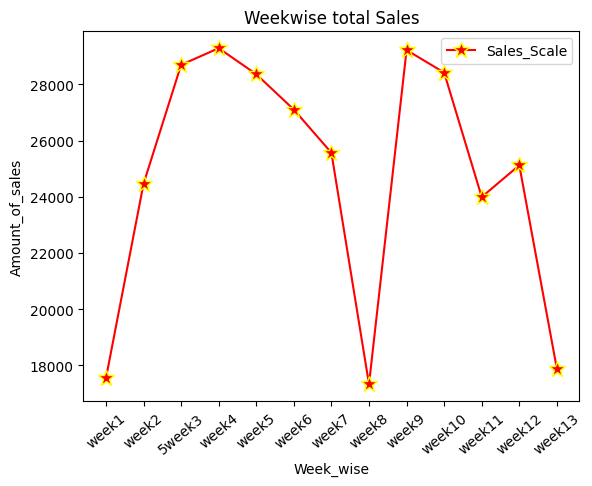

In [10]:
#weekwise & Monthwise_sales

wants=int(input("1.Weekwise\n2.Monthwise"))
if wants==1:
    week=np.array(dsp['Total'].resample("w").sum())
    x=["week1","week2","5week3","week4","week5","week6","week7","week8","week9","week10","week11","week12","week13"]


    plt.plot(x,week,label="Sales_Scale",color='red',marker='*',markersize=12,markeredgecolor='yellow')
    plt.xticks(x,rotation=40)

    plt.xlabel("Week_wise")
    plt.ylabel("Amount_of_sales")
    plt.title("Weekwise total Sales")
    plt.legend()

else:
    month=np.array(dsp['Total'].resample("M").sum())
    x=["Jan","Feb","Mar"]

    plt.plot(x,month,linestyle='dashed',marker='o',markeredgecolor='green',markersize=10,label="Monthwise_Scale")

    plt.xlabel("Month_wise")
    
    plt.ylabel("Amount_of_sales")
    plt.title("Month total Sales")
    plt.legend()

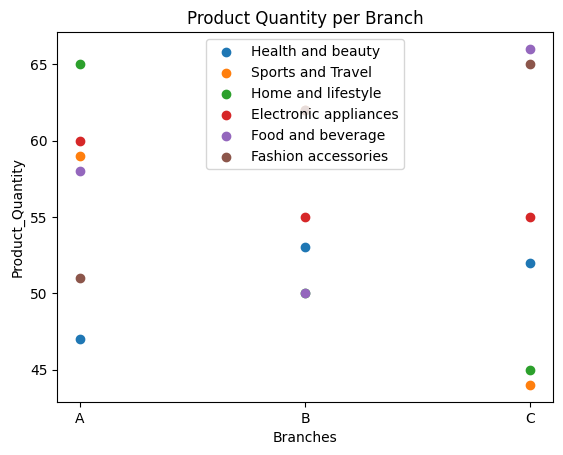

In [11]:
sales_item_data
hb=np.array(sales_item_data['Health and beauty'])
st=np.array(sales_item_data['Sports and Travel'])
hl=np.array(sales_item_data['Home and lifestyle'])
ea=np.array(sales_item_data['Electronic appliances'])
fb=np.array(sales_item_data['Food and beverage'])
fa=np.array(sales_item_data['Fashion Accessories'])



x=["A","B","C"]
plt.scatter(x,hb,label="Health and beauty")
plt.scatter(x,st,label="Sports and Travel")
plt.scatter(x,hl,label="Home and lifestyle")
plt.scatter(x,ea,label="Electronic appliances")
plt.scatter(x,fb,label="Food and beverage")
plt.scatter(x,fa,label="Fashion accessories")

plt.xlabel("Branches")
plt.ylabel("Product_Quantity")
plt.title("Product Quantity per Branch")

plt.legend(loc='upper center')
plt.show()
